<h1>Importing libraries</h1>

In [5]:
import numpy as np
import pandas as pd
import pandas_profiling
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.model_selection import train_test_split


# Importing the Dataset
In this section we are importing the required dataset into our notebook, using the pandas library

In [6]:
hf=pd.read_csv('C:/Users/OMEN/Py/dataset/housing.csv')

<h1>Exploring the Data</h1>
Here we are taking a quick glance at our dataset, so that we can understand our data and observe it.

The head is used to give us the first 5 rows of the whole data.

In [7]:
hf.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200

<ul>
    <li>the info() method is used to get the quick information about the data</li>
    <li>it provides us with the particular no. of rows</li>
    <li>as well as with column names and number of non null values</li>
    </ul>

In [8]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


as we can see from above data, that there are two types of attributes here, viz.,catergorial and numerical.
the attribute 'ocean_proximity' is a categorical value and rest of them are numerical. 

<h1>Pandas_profiling</h1>
Pandas profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code.
<ol>
    <li> we can get a detailed info about our dataset by using the 'pandas_profiling' library</li>
<li>we can get the missing values memory used and can know many more things about our dataset using this library</li>
    </ol>

In [159]:
pandas_profiling.ProfileReport(hf)

# Classifying the Null Values in Dataset
In this section, we are first identifying the null values and after identifying them we are treating them with the most appropriate method
<ol>
    <li>As we can see there are some null values in the 'total_bedroom' column so we have to treat the</li> 
    <li>null values inorder to get the maximum out of our data</li>
    <li> the isnull funtion is used to get the null values in our dataset columnwise,/li>
        <li> the sum function will give us the sum of all null values</li>
    </ol>

In [9]:
hf.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

visualising the null values in the data

By using the missingno library we are able to visualise the null values that are present in different columns of our data

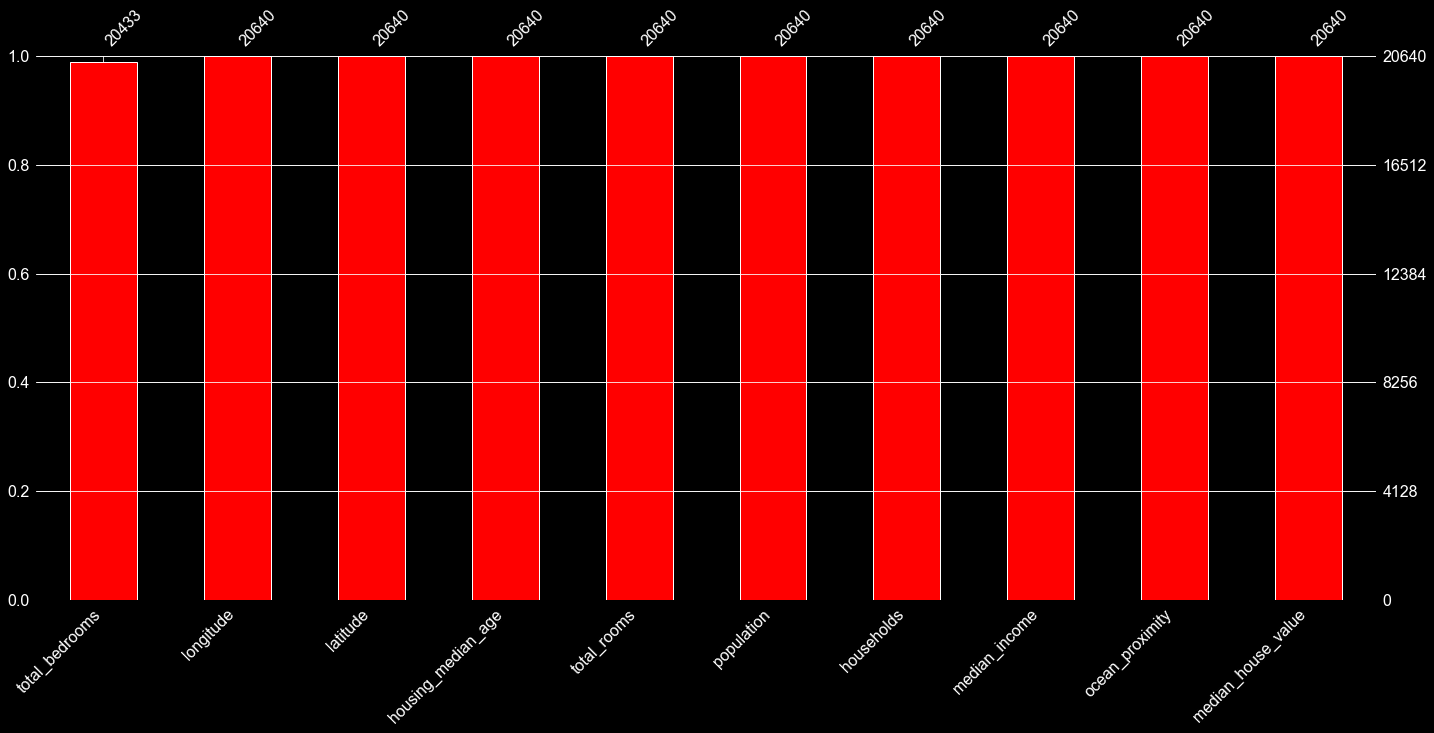

In [18]:
sns.set_style('darkgrid')
plt.style.use('dark_background')
msno.bar(hf,color=[1,0,0],sort='ascending')

From the above graph we can conclude that there are null values present in the total_bedrooms column now we must remove those values to get the most out of our data

<h5>The function is used to calculate the mode of the specific column</h5>

In [7]:
hf['total_bedrooms'].mode()

0    280.0
dtype: float64

<h4><ol>
    <li>As we can see that there are 207 null values in the 'total_bedrooms' attribute/column.</li>
    <li>Now we are going to treat these values with the most appropriate way.</li>
    <li>Treated the null values with the mode of the column</li>
    </ol></h4>

In [8]:
hf.fillna(value=280.0,inplace=True)

<h5>After filling the null values there will not be any null values<h5>

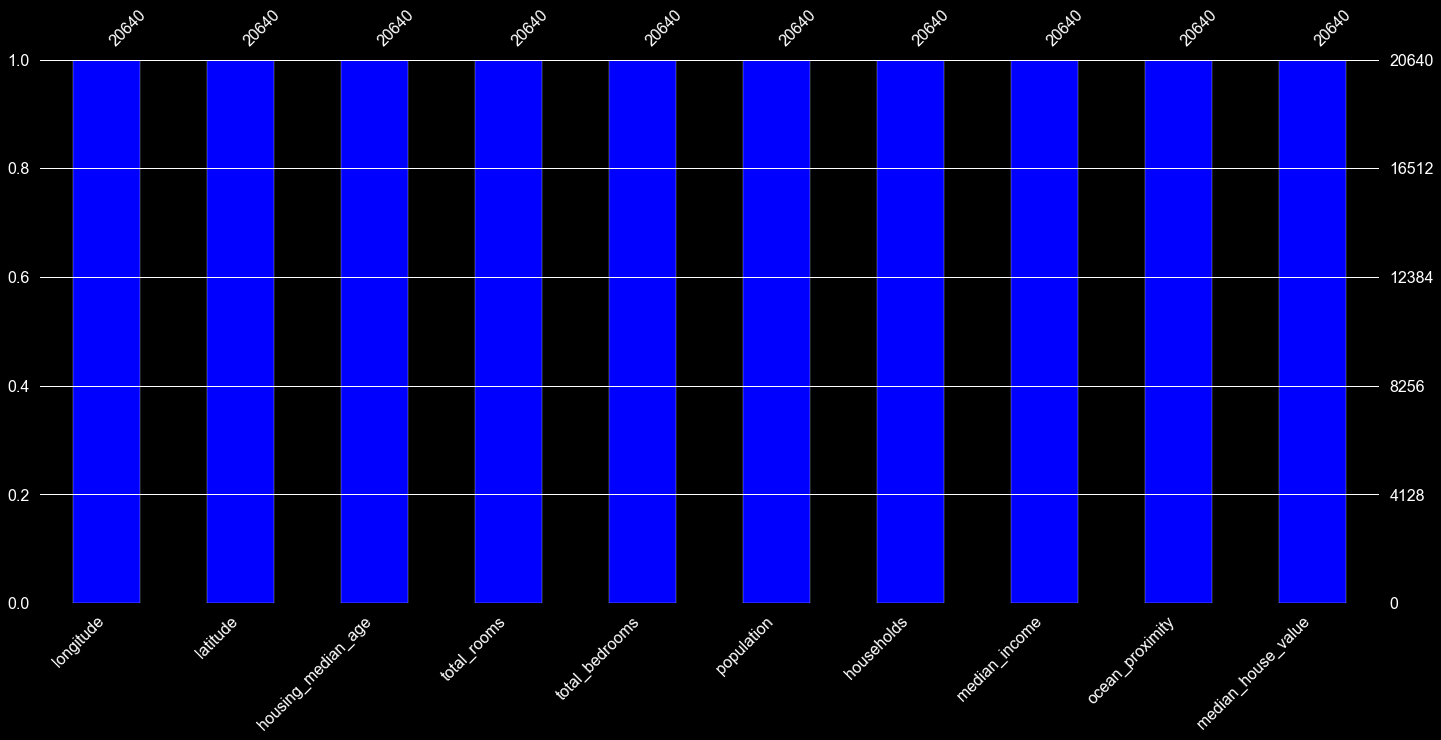

In [142]:
sns.set_style('darkgrid')
plt.style.use('dark_background')
msno.bar(hf,color=[0,0,1],sort='ascending')

Now we can see that there are no null values in the data now all the data is filled with mode of the column

<ol>
<li>Description of the data is calculated using describe function</li>
<li>It provides us with the useful values such as mean,std,min,max,etc</li>
</ol>

In [9]:
hf.describe()


longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       535.284351   1425.476744    499.539680       3.870671   
std        420.053240   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        292.000000    787.000000    280.000000       2.563400   
50%        431.000000   1166.000000    409.000000       3.534800   
75%        643.250000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

# Visualization of Data
In this part we will visualize our data using various graphs and will see that whether our data contains outliers and will compare our data.
<ul>
    <li>Pivot table is used to transform the selected columns in to a seperate table</li>
<li>Pivot table is formed by using the three columns of our database ,latitude will be our index ,longitude will be our columns and</li> 
     <li>The values entered will be of the median_house_value</li>
    </ul>


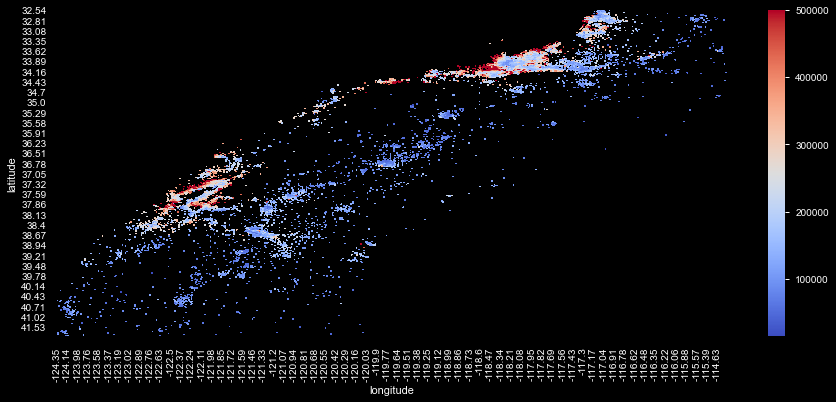

In [58]:
house_pivot=hf.pivot_table(values='median_house_value',columns='longitude',index='latitude')
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
plt.style.use('dark_background')
sns.heatmap(house_pivot,cmap='coolwarm',xticklabels='auto')

From the above graph we can know the prices of the houses according to the coordinates of the house

<h3>Below</h3>
<ul>
    <li>In this we are going to plot a scatter plot onto an existing image which is in the same folder of our notebook</li>
<li>The imshow() function of the pyplot library is used to show the image according to the extent</li>
        <li>The imread() function is used to read the image from the file</li>
    </ul>

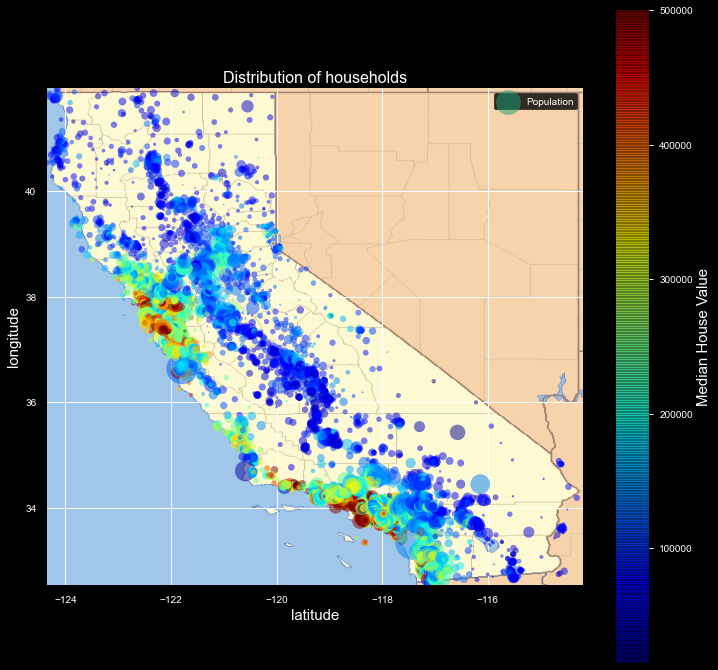

In [59]:
plt.figure(figsize=(12,12))
img=plt.imread('b.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])
plt.scatter(x=hf['longitude'],y=hf['latitude'],alpha=0.5,s=hf['population']/30,c=hf['median_house_value'],cmap=plt.get_cmap("jet"),zorder=1,label='Population')
cbar=plt.colorbar()# colorbar is used to show the colorbar 
cbar.set_label('Median House Value',size=15)
plt.xlabel('latitude',size=15)
plt.ylabel('longitude',size=15)
plt.title("Distribution of households",size=16)
plt.legend()# the legend function is used to place a legend on the plot

From the above graph we can see that the houses which are close to the ocean are having more price than the houses which are far from the ocean and the prices are related to the population also

# Corr() Function
The value of the coefficient always lie between the -1 to 1. The positive correlation coefficient indicates that it is directly related with the column and negative values indicate that those columns are inversely related
<ul>
    <li>The corr() function is used to define the correlation between various columns of the dataframe with each other.
<li>The default correlation coefficient in this function is Pearsons's coefficient we can specify different correlation coefficient by passing it in the method parameter.</li> 
<li>here we are taking only those columns which have either integer datatypes or the float datatypes.</li>
<li>after this we are going to plot a graph between the correlation values of the datatypes.</li>
    </ul>

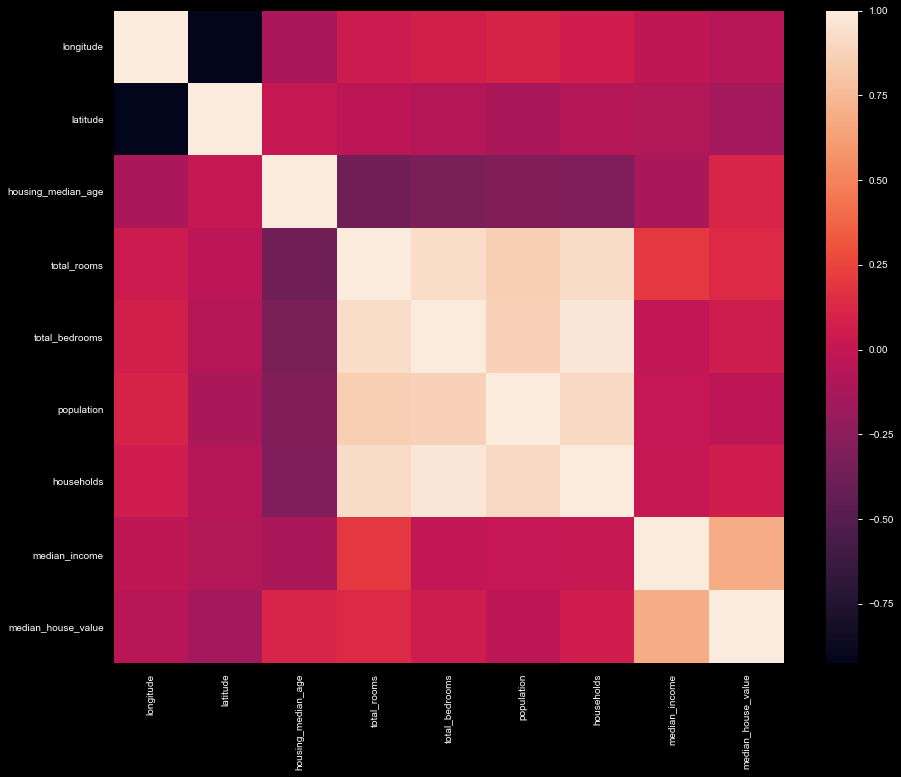

In [10]:
corr=hf.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,vmax=1)

In [119]:
cor_matrix=hf.corr()
print('correaltion values in descending order :')
cor_matrix['median_house_value'].sort_values(ascending=False)


correaltion values in descending order :


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049406
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

As we already know that, the median_house_value will be totally related each other therefore the median_house_value will be totally related with each other therefore the value of correlation is 1.00000, after that the column which is closely related with the median_house_value is the median_income and after that all the columns are sorted according to their coefficient values. Negative values indicate that the columns are inversely related with the median_house_value column

Text(0.5, 0, 'median_income')

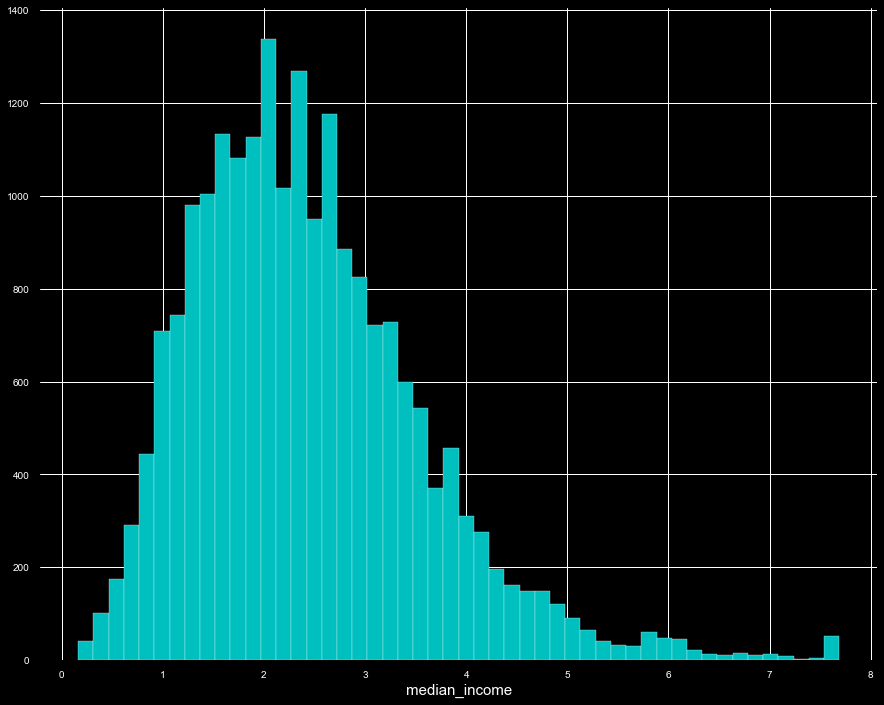

In [223]:
plt.figure(figsize=(15,12))
sns.distplot(hf['median_income'],bins=50,kde=False,color='c',hist_kws={'alpha':1})
plt.xlabel('median_income',size=15)

We can see that the median_house_value is skewed

Text(0.5, 0, 'housing_median_age')

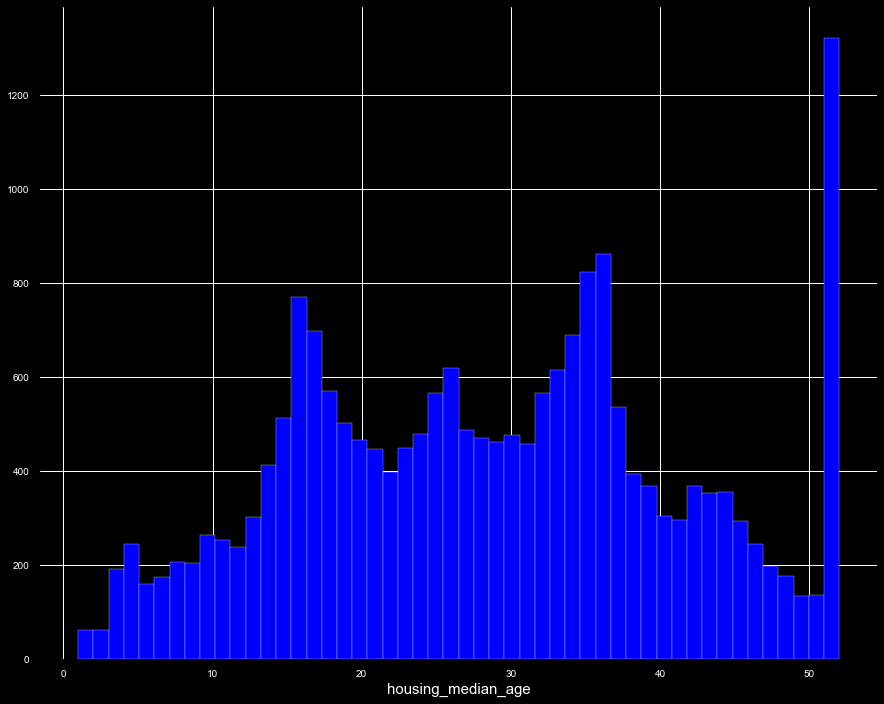

In [218]:
plt.figure(figsize=(15,12))
sns.distplot(hf['housing_median_age'],bins=50,kde=False,color='b',hist_kws={'alpha':1})
plt.xlabel('housing_median_age',size=15)

There is a peak at the end of the housing_median_Age column

Households column is also skewed at the starting

Text(0.5, 0, 'total_bedrooms')

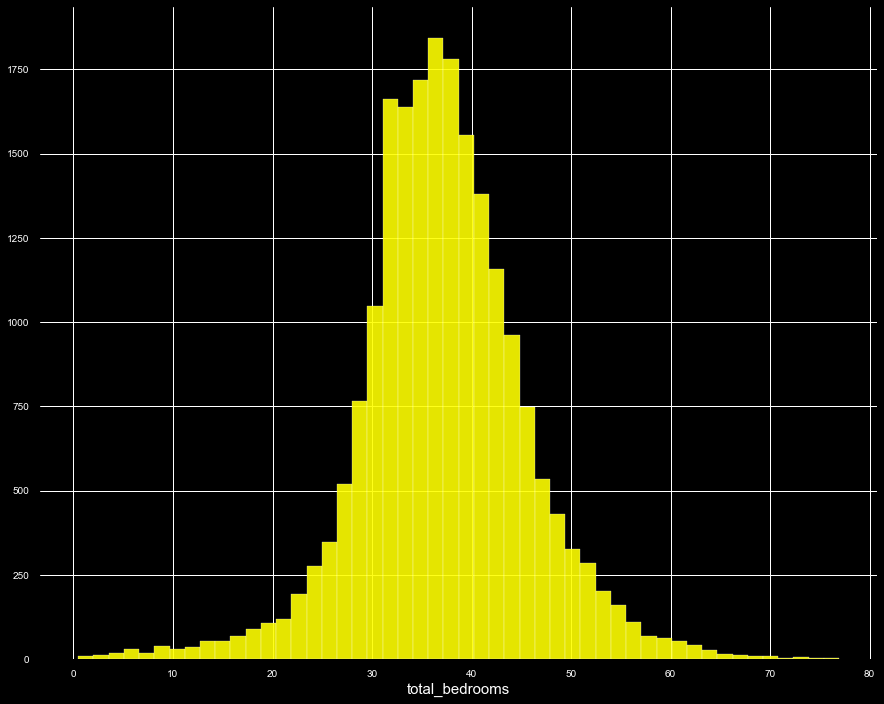

In [219]:
plt.figure(figsize=(15,12))
sns.distplot(hf['total_bedrooms'],bins=50,kde=False,color='y',hist_kws={'alpha':0.9})
plt.xlabel('total_bedrooms',size=15)

From the above graph we can infer that this variable is also skewed

From the above graph we can infer that this variable is also skewed

# Correcting the Skewed Variables

In [11]:
hf['households']=hf['households'].apply(lambda x: np.log1p(x)**2)
hf['population']=hf['population'].apply(lambda x: np.log1p(x)**2)
hf['total_bedrooms']=hf['total_bedrooms'].apply(lambda x: np.log1p(x)**2)
hf['total_rooms']=hf['total_rooms'].apply(lambda x: np.log1p(x)**2)
hf['median_income']=hf['median_income'].apply(lambda x: np.log1p(x)**2)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002318C463208>,
      dtype=object)

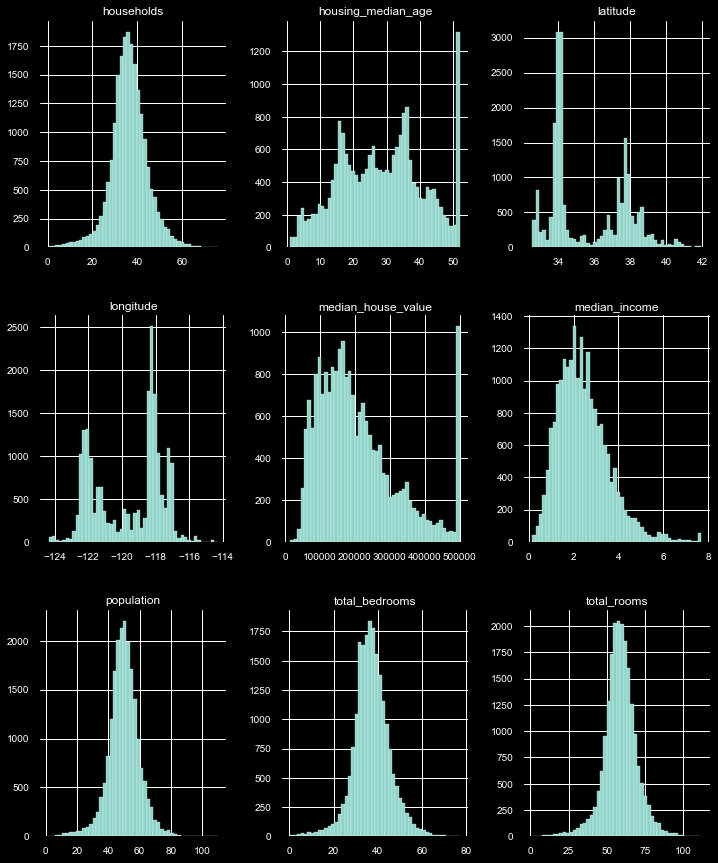

In [12]:
hf.hist(bins=50,figsize=(12,15))

# Visualising the Categorical Variables

In [147]:
# categorical features
hf.select_dtypes(include='object').columns

Index(['ocean_proximity'], dtype='object')

We can see from above that only the ocean_proximity column is of the datatype object

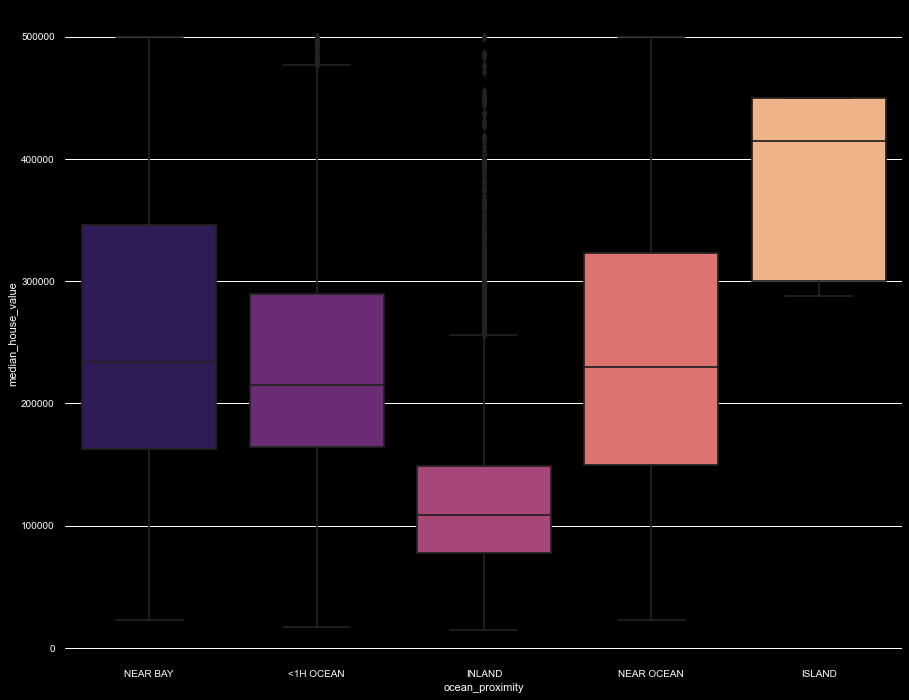

In [148]:
plt.figure(figsize=(15,12))
sns.boxplot(x='ocean_proximity',y='median_house_value',data=hf,palette='magma')

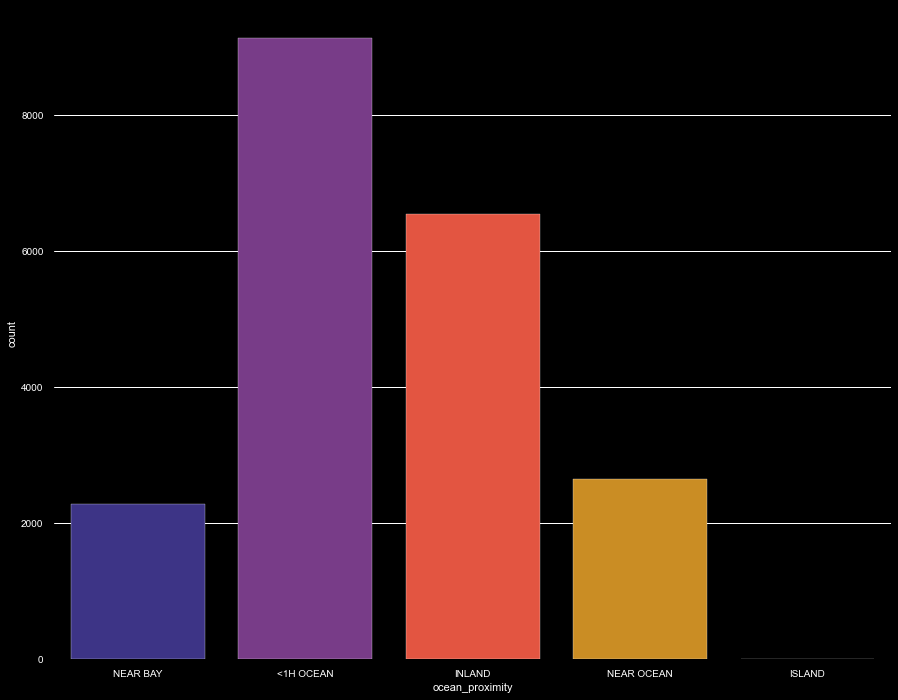

In [125]:
plt.figure(figsize=(15,12))
sns.countplot(x='ocean_proximity',data=hf,palette='CMRmap')

<Figure size 1080x864 with 0 Axes>

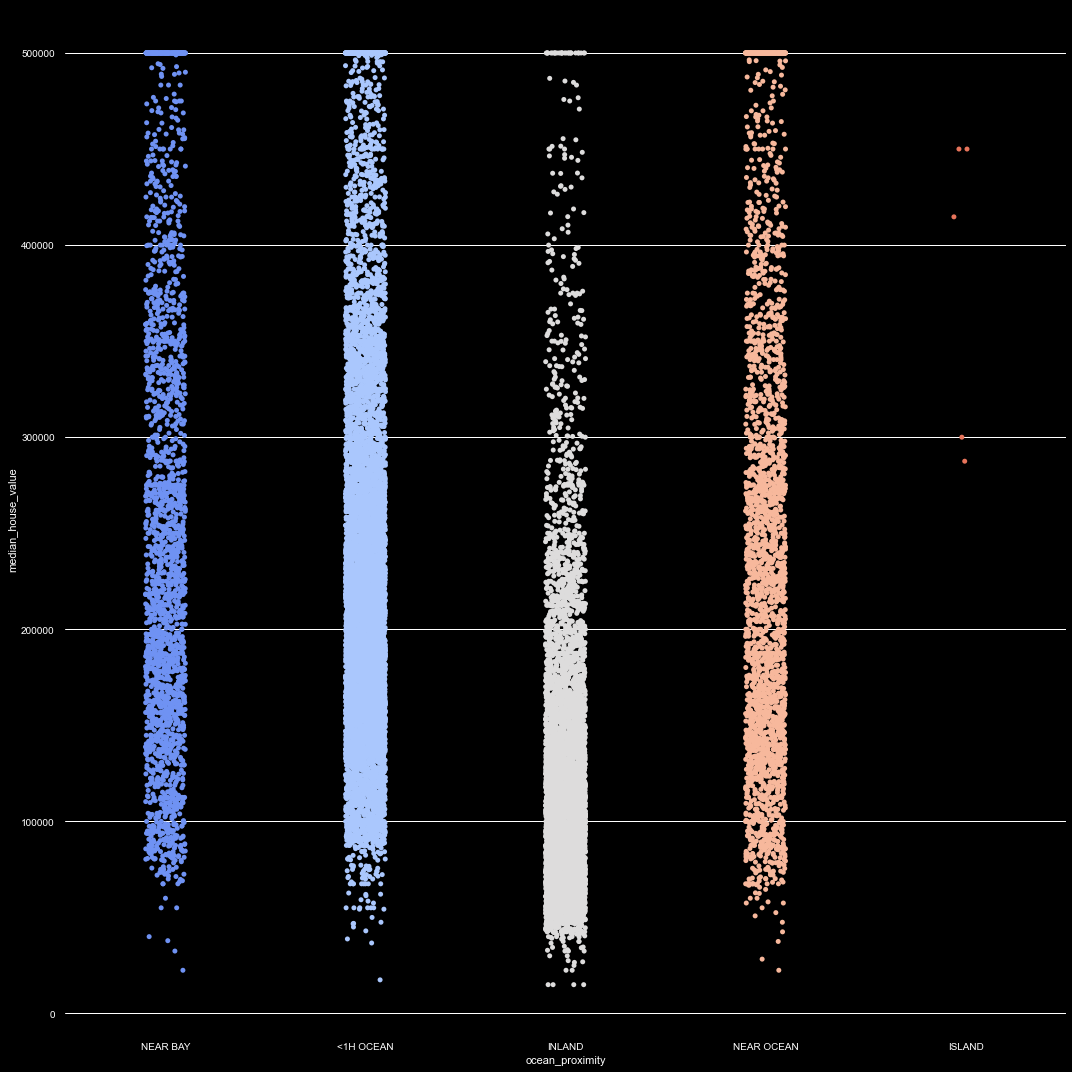

In [126]:
plt.figure(figsize=(15,12))
sns.catplot('ocean_proximity','median_house_value',data=hf,height=15,palette='coolwarm')

From the above plot we can say that there are very few people on the island in comparison to the other places

# Changing the Categorical Variables 
As we all know that for training our model we will have to remove all the categorical variables from our dataset. We are removing the categorical variables in the following section:
<ul>
    <li>We have ocean_proximity as the categorical variable so we have to treat it because in order to train our machine we must remove all the categorical variables</li>
    <li>Dummy variables </li>
<li>Here we are making the dummy variable from our categorical variable using the get_dummies function of the pandas library</li>
    </ul>

In [13]:
x1=pd.get_dummies(hf['ocean_proximity'])
hf=pd.concat([hf,x1],axis='columns')
hf.drop('ocean_proximity',inplace=True,axis='columns')

In [14]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   <1H OCEAN           20640 non-null  uint8  
 10  INLAND              20640 non-null  uint8  
 11  ISLAND              20640 non-null  uint8  
 12  NEAR BAY            20640 non-null  uint8  
 13  NEAR OCEAN          20640 non-null  uint8  
dtypes: float64(7), int64(2), uint8(5)
memory usage: 1.5 MB


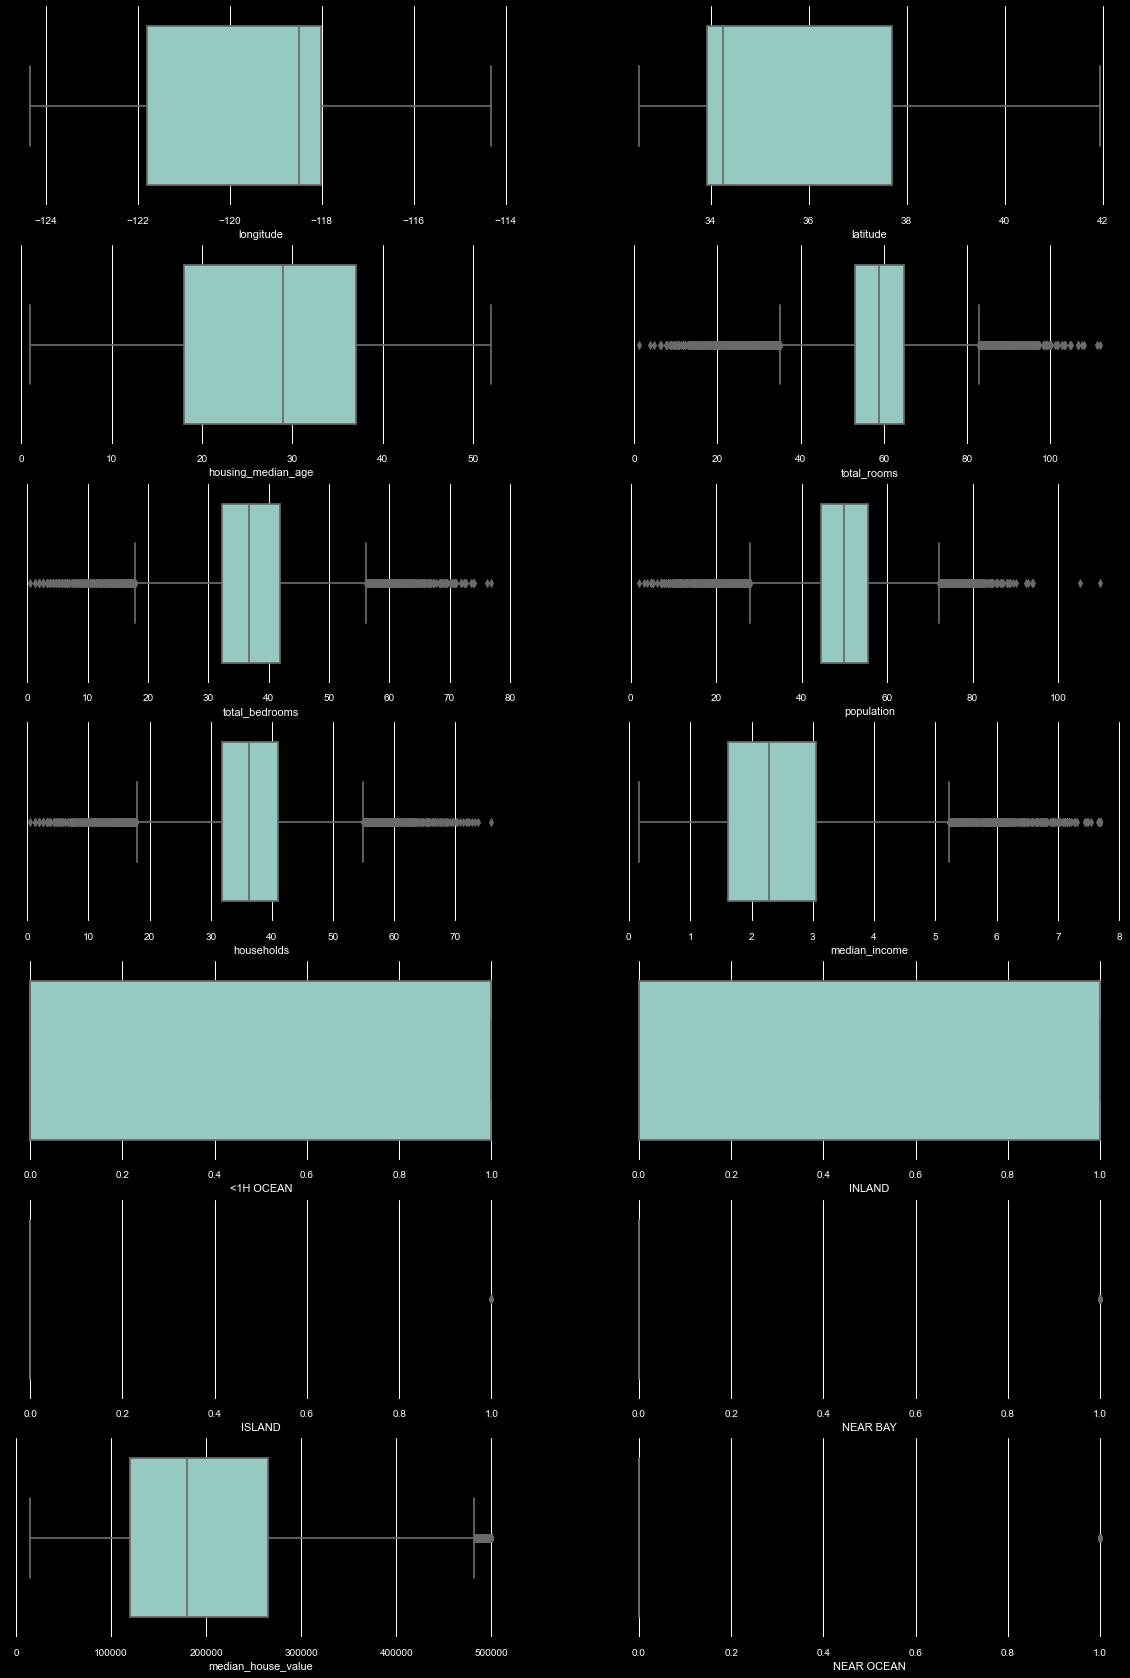

In [151]:
fig,axes=plt.subplots(nrows=7,ncols=2,figsize=(20,30))
sns.boxplot(x='longitude',data=hf,ax=axes[0,0])
sns.boxplot(x='latitude',data=hf,ax=axes[0,1])
sns.boxplot(x='housing_median_age',data=hf,ax=axes[1,0])
sns.boxplot(x='total_rooms',data=hf,ax=axes[1,1])
sns.boxplot(x='total_bedrooms',data=hf,ax=axes[2,0])
sns.boxplot(x='population',data=hf,ax=axes[2,1])
sns.boxplot(x='households',data=hf,ax=axes[3,0])
sns.boxplot(x='median_income',data=hf,ax=axes[3,1])
sns.boxplot(x='<1H OCEAN',data=hf,ax=axes[4,0])
sns.boxplot(x='INLAND',data=hf,ax=axes[4,1])
sns.boxplot(x='ISLAND',data=hf,ax=axes[5,0])
sns.boxplot(x='NEAR BAY',data=hf,ax=axes[5,1])
sns.boxplot(x='NEAR OCEAN',data=hf,ax=axes[6,1])
sns.boxplot(x='median_house_value',data=hf,ax=axes[6,0])

From the above boxplots we can easily see that there are many outliers present in the dataset. We will classify these outliers in the next part

# Detecting Outliers
In this section we are going to detect the outliers in the various columns of our dataset
We are detecting outliers with the help of zscore.   
zscore is calculated as follows:  
      zscore=(x-mean)/std  
where 'x' refers to the observed value, 'mean' is the mean, 'std' refers to the standard deviation

In [86]:
outlier=[]
def detectoutliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>3:
            outlier.append(i)
    return outlier

# Detecting Outliers in Various Columns

In [15]:
x=detectoutliers(hf['total_bedrooms'])
np.min(x)
hf[hf['total_bedrooms']>np.min(x)]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
95       -122.26     37.80                  36         5329          2477.0   
104      -122.26     37.81                  34         5871          1914.0   
283      -122.16     37.79                  22        12842          2048.0   
508      -122.30     37.84                  14         7355          2408.0   
570      -122.24     37.72                   5        18634          2885.0   
...          ...       ...                 ...          ...             ...   
20530    -121.76     38.57                  11        15018          3008.0   
20543    -121.74     38.55                  33         6861          1820.0   
20544    -121.76     38.55                  23         8800          1857.0   
20563    -121.75     38.67                   9        12139          2640.0   
20629    -121.39     39.12                  28        10035          1856.0   

       population  households  median_income  median_house_value  <1H OCEAN  \
95           3469        2323         2.0096              130000          0   
104          2689        1789         2.8406              335700          0   
283          4985        1967         5.9849              371000          0   
508          3100        2051         4.0018              143800          0   
570          7427        2718         7.6110              350700          0   
...           ...         ...            ...                 ...        ...   
20530        7984        2962         3.1371              201800          0   
20543        3717        1767         1.7311              182600          0   
20544        6330        1832         2.0650              219400          0   
20563        6837        2358         3.1250              132500          0   
20629        6912        1818         2.0943              108300          0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
95          0       0         1           0  
104         0       0         1           0  
283         0       0         1           0  
508         0       0         1           0  
570         0       0         1           0  
...       ...     ...       ...         ...  
20530       1       0         0           0  
20543       1       0         0           0  
20544       1       0         0           0  
20563       1       0         0           0  
20629       1       0         0           0  

[372 rows x 14 columns]

In [257]:
x=detectoutliers(hf['total_rooms'])
np.min(x)
hf[hf['total_rooms']>np.min(x)]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1        -122.22     37.86                  21         7099          1106.0   
6        -122.25     37.84                  52         2535           489.0   
7        -122.25     37.84                  52         3104           687.0   
8        -122.26     37.84                  42         2555           665.0   
9        -122.25     37.84                  52         3549           707.0   
...          ...       ...                 ...          ...             ...   
20633    -121.53     39.19                  27         2080           412.0   
20634    -121.56     39.27                  28         2332           395.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  median_house_value  <1H OCEAN  \
1            2401        1138         8.3014              358500          0   
6            1094         514         3.6591              299200          0   
7            1157         647         3.1200              241400          0   
8            1206         595         2.0804              226700          0   
9            1551         714         3.6912              261100          0   
...           ...         ...            ...                 ...        ...   
20633        1082         382         2.5495               98300          0   
20634        1041         344         3.7125              116800          0   
20637        1007         433         1.7000               92300          0   
20638         741         349         1.8672               84700          0   
20639        1387         530         2.3886               89400          0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
1           0       0         1           0  
6           0       0         1           0  
7           0       0         1           0  
8           0       0         1           0  
9           0       0         1           0  
...       ...     ...       ...         ...  
20633       1       0         0           0  
20634       1       0         0           0  
20637       1       0         0           0  
20638       1       0         0           0  
20639       1       0         0           0  

[12694 rows x 14 columns]

In [258]:
x=detectoutliers(hf['population'])
np.min(x)
hf[hf['population']>np.min(x)]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1        -122.22     37.86                  21         7099          1106.0   
52       -122.27     37.82                  41         3221           853.0   
69       -122.29     37.81                  46         2801           644.0   
95       -122.26     37.80                  36         5329          2477.0   
96       -122.26     37.82                  31         4596          1331.0   
...          ...       ...                 ...          ...             ...   
20595    -121.56     39.16                  12         3349           642.0   
20603    -121.54     39.13                  18         4289          1021.0   
20604    -121.54     39.12                  17         4251           899.0   
20605    -121.58     39.12                  26         2796           629.0   
20629    -121.39     39.12                  28        10035          1856.0   

       population  households  median_income  median_house_value  <1H OCEAN  \
1            2401        1138         8.3014              358500          0   
52           1959         720         1.1108               97500          0   
69           1823         611         0.9802              129200          0   
95           3469        2323         2.0096              130000          0   
96           2048        1180         2.8345              183800          0   
...           ...         ...            ...                 ...        ...   
20595        2029         619         2.9647               88800          0   
20603        2707         939         1.3375               59600          0   
20604        3265         934         2.3496               65000          0   
20605        2017         632         1.8355               61200          0   
20629        6912        1818         2.0943              108300          0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
1           0       0         1           0  
52          0       0         1           0  
69          0       0         1           0  
95          0       0         1           0  
96          0       0         1           0  
...       ...     ...       ...         ...  
20595       1       0         0           0  
20603       1       0         0           0  
20604       1       0         0           0  
20605       1       0         0           0  
20629       1       0         0           0  

[4735 rows x 14 columns]

In [259]:
x=detectoutliers(hf['housing_median_age'])
np.min(x)
hf[hf['housing_median_age']>np.min(x)]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, <1H OCEAN, INLAND, ISLAND, NEAR BAY, NEAR OCEAN]
Index: []

In [260]:
x=detectoutliers(hf['households'])
np.min(x)
hf[hf['households']>np.min(x)]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
95       -122.26     37.80                  36         5329          2477.0   
104      -122.26     37.81                  34         5871          1914.0   
116      -122.25     37.83                  28         5022          1750.0   
283      -122.16     37.79                  22        12842          2048.0   
485      -122.26     37.86                  35         5161          1744.0   
...          ...       ...                 ...          ...             ...   
20530    -121.76     38.57                  11        15018          3008.0   
20543    -121.74     38.55                  33         6861          1820.0   
20544    -121.76     38.55                  23         8800          1857.0   
20563    -121.75     38.67                   9        12139          2640.0   
20629    -121.39     39.12                  28        10035          1856.0   

       population  households  median_income  median_house_value  <1H OCEAN  \
95           3469        2323         2.0096              130000          0   
104          2689        1789         2.8406              335700          0   
116          2558        1661         2.4234              218500          0   
283          4985        1967         5.9849              371000          0   
485          3276        1742         1.6307              253600          0   
...           ...         ...            ...                 ...        ...   
20530        7984        2962         3.1371              201800          0   
20543        3717        1767         1.7311              182600          0   
20544        6330        1832         2.0650              219400          0   
20563        6837        2358         3.1250              132500          0   
20629        6912        1818         2.0943              108300          0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
95          0       0         1           0  
104         0       0         1           0  
116         0       0         1           0  
283         0       0         1           0  
485         0       0         1           0  
...       ...     ...       ...         ...  
20530       1       0         0           0  
20543       1       0         0           0  
20544       1       0         0           0  
20563       1       0         0           0  
20629       1       0         0           0  

[362 rows x 14 columns]

In [261]:
x=detectoutliers(hf['median_income'])
np.min(x)
hf[hf['median_income']>np.min(x)]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
131      -122.19     37.84                  18         1617           210.0   
409      -122.28     37.90                  52         2003           250.0   
510      -122.22     37.82                  39         2492           310.0   
511      -122.22     37.82                  42         2991           335.0   
512      -122.23     37.82                  52         3242           366.0   
...          ...       ...                 ...          ...             ...   
20376    -118.86     34.16                  16         1509           216.0   
20380    -118.83     34.14                  16         1316           194.0   
20389    -118.90     34.19                  26         1582           196.0   
20426    -118.69     34.18                  11         1177           138.0   
20436    -118.69     34.21                  10         3663           409.0   

       population  households  median_income  median_house_value  <1H OCEAN  \
131           533         194        11.6017              392600          0   
409           658         244        10.0825              397000          0   
510           808         315        11.8603              500001          0   
511          1018         335        13.4990              500001          0   
512          1001         352        12.2138              500001          0   
...           ...         ...            ...                 ...        ...   
20376         578         235        10.2614              410800          1   
20380         450         173        10.1597              500001          0   
20389         573         182        10.0595              500001          1   
20426         415         119        10.0472              500001          1   
20436        1179         371        12.5420              500001          1   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
131         0       0         1           0  
409         0       0         1           0  
510         0       0         1           0  
511         0       0         1           0  
512         0       0         1           0  
...       ...     ...       ...         ...  
20376       0       0         0           0  
20380       0       0         0           1  
20389       0       0         0           0  
20426       0       0         0           0  
20436       0       0         0           0  

[344 rows x 14 columns]

In [15]:
hf.to_csv('newhouse1',index=False)

In [16]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   <1H OCEAN           20640 non-null  uint8  
 10  INLAND              20640 non-null  uint8  
 11  ISLAND              20640 non-null  uint8  
 12  NEAR BAY            20640 non-null  uint8  
 13  NEAR OCEAN          20640 non-null  uint8  
dtypes: float64(7), int64(2), uint8(5)
memory usage: 1.5 MB


In [17]:
x=hf.columns.values
hf=hf.reindex(columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY','NEAR OCEAN','median_house_value'])
hf

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41    45.982743       23.692892   
1        -122.22     37.86                  21    78.638765       49.131814   
2        -122.24     37.85                  52    53.168250       27.586376   
3        -122.25     37.85                  52    51.132531       29.853458   
4        -122.25     37.85                  52    54.687616       31.791043   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25    55.029407       35.128452   
20636    -121.21     39.49                  18    42.879173       25.173097   
20637    -121.22     39.43                  17    59.612378       38.269177   
20638    -121.32     39.43                  18    56.683872       36.194147   
20639    -121.24     39.37                  16    62.922369       41.278942   

       population  households  median_income  <1H OCEAN  INLAND  ISLAND  \
0       33.381266   23.466149       4.985040          0       0       0   
1       60.591543   49.532120       4.973636          0       0       0   
2       38.546590   26.850881       4.456784          0       0       0   
3       40.020167   29.091218       3.585640          0       0       0   
4       40.177775   30.921180       2.490699          0       0       0   
...           ...         ...            ...        ...     ...     ...   
20635   45.434601   33.664578       0.883834          0       1       0   
20636   34.547778   22.514381       1.610009          0       1       0   
20637   47.827231   36.881870       0.986549          0       1       0   
20638   43.683497   34.315381       1.109517          0       1       0   
20639   52.354184   39.372638       1.489417          0       1       0   

       NEAR BAY  NEAR OCEAN  median_house_value  
0             1           0              452600  
1             1           0              358500  
2             1           0              352100  
3             1           0              341300  
4             1           0              342200  
...         ...         ...                 ...  
20635         0           0               78100  
20636         0           0               77100  
20637         0           0               92300  
20638         0           0               84700  
20639         0           0               89400  

[20640 rows x 14 columns]

In [18]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   <1H OCEAN           20640 non-null  uint8  
 9   INLAND              20640 non-null  uint8  
 10  ISLAND              20640 non-null  uint8  
 11  NEAR BAY            20640 non-null  uint8  
 12  NEAR OCEAN          20640 non-null  uint8  
 13  median_house_value  20640 non-null  int64  
dtypes: float64(7), int64(2), uint8(5)
memory usage: 1.5 MB


In [19]:
corrdf=hf.corr()
corrdf['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690173
<1H OCEAN             0.256617
total_rooms           0.165306
NEAR BAY              0.160284
NEAR OCEAN            0.141862
housing_median_age    0.105623
households            0.076568
total_bedrooms        0.055871
ISLAND                0.023416
population           -0.024201
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

# Dividing the variables for Training of Models

In [20]:
x=hf.iloc[:,:-1]
y=hf.iloc[:,-1]
print('Independent Variables : \n',x.columns.values)
print('Dependent Variable : \n',y.name)

Independent Variables : 
 ['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income' '<1H OCEAN'
 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
Dependent Variable : 
 median_house_value


<ul>
<li>Here we are dividing the independent and dependent variables into training and testing dataset.</li>
<li>We are dividing our x and y variables into training and testing datasets with the proportion of dataset '0.3'.</li>
<li>0.3 here tells us that 70% of the data is used for training the machine and the rest 30% of the data is used for the testing purposes</li>
</ul>

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print("x_train shape {} and size {}".format(x_train.shape,x_train.size))
print("x_test shape {} and size {}".format(x_test.shape,x_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

x_train shape (16512, 13) and size 214656
x_test shape (4128, 13) and size 53664
y_train shape (16512,) and size 16512
y_test shape (4128,) and size 4128


# Linear Regression
Linear regression is m/l algorithm based on supervised learning. This technique performs the task to predict a dependent variable value (y) based on a given independent variable (x). The regression line is the best fit line for our model.
The equation of the line is :  
       y = mx + c  
where 'm' is the slope and 'c' is the intercept

In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
from sklearn.metrics import mean_squared_error,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from math import sqrt
print('R2_score : ',r2_score(y_test,pred))
rmse=sqrt(mean_squared_error(y_test,pred))
print('RMSE : ',rmse)


R2_score :  0.6635221299809003
RMSE :  66775.73249443709


RMSE of above model is 67960 which means that there's an average error of $66362 in prediction of house price.

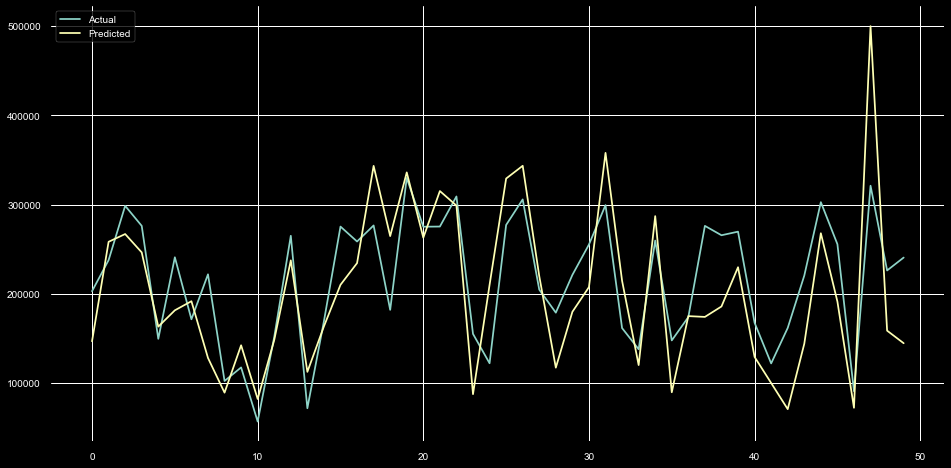

In [25]:
test = pd.DataFrame({'Predicted':pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

<h1>DECISION TREE REGRESSOR</h1>

In [71]:
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor(random_state=5)
decision_tree.fit(x_train,y_train)
predict=decision_tree.predict(x_test)
print('R2 score : ',r2_score(y_test,predict))
rmse=sqrt(mean_squared_error(y_test,predict))
print('RMSE : ',rmse)

R2 score :  0.6724415495208891
RMSE :  65884.73623673584


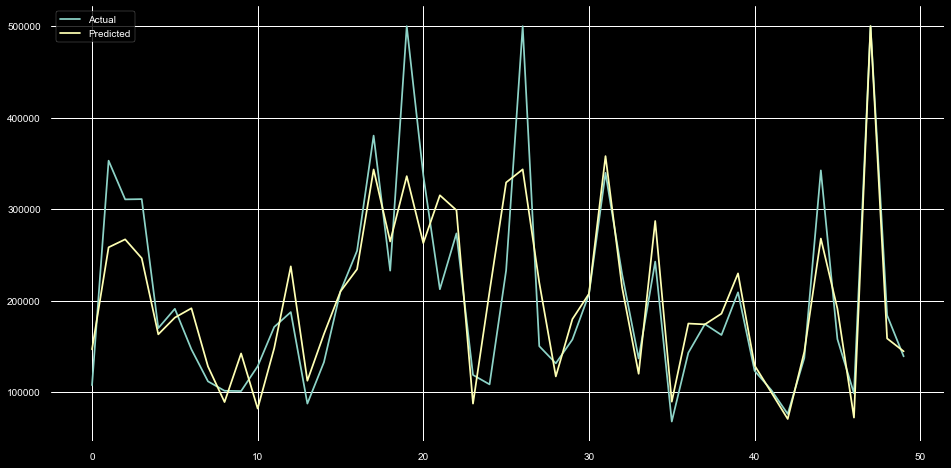

In [28]:
test = pd.DataFrame({'Predicted':predict,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

<h1>RANDOM FOREST REGRESSOR</h1>

In [67]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor(n_estimators=200,random_state=12)
rfc.fit(x_train,y_train)
predictions=rfc.predict(x_test)
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('R2 score : ',r2_score(y_test,predictions))
mse=mean_squared_error(y_test,predictions)
print('RMSE : ',rmse)

R2 score :  0.8228392605117764
RMSE :  65884.73623673584


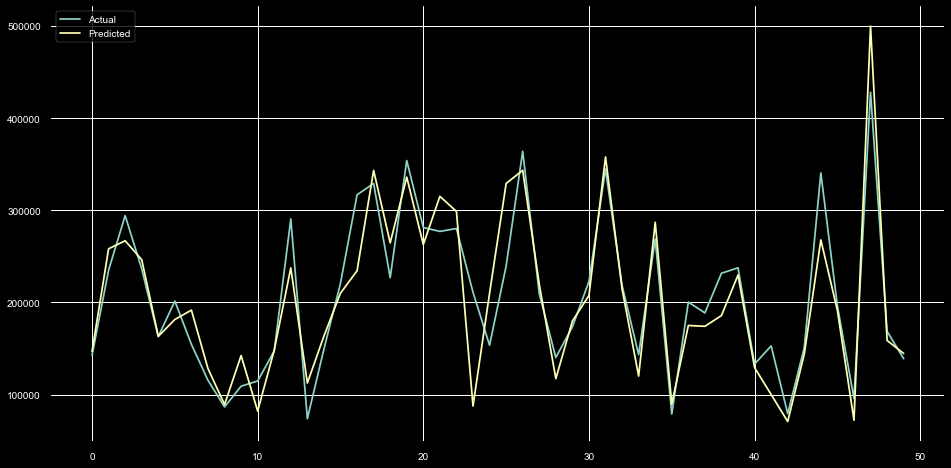

In [30]:
test = pd.DataFrame({'Predicted':predictions,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(max_depth=2,n_estimators=3)
regressor.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [57]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(x_test)]
best_n_estimators = np.argmin(errors)

In [87]:
best_regressor = GradientBoostingRegressor(max_depth=8,max_features=6,n_estimators=100,min_samples_split=200,random_state=60)
best_regressor.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8, max_features=6,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=200, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=60, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [88]:
y_predictionsis = best_regressor.predict(x_test)

In [89]:
r2_score(y_test,y_predictionsis)

0.8295143844118921